# Latihan 3: Mengakses WebMap dan WebScenes

WebMap dan WebScene merupakan dua platform untuk menampilkan data spasial yang dapat diakses oleh pengguna baik di dalam maupun di luar organisasi portal. Pada ArcGIS Notebook, Webmap dan scenes disimpan pada portal, dan antarmukanya pada Notebook dapat dilakukan melalui penggunaan modul  `arcgis.mapping`.



In [24]:
from IPython.display import display
import arcgis
from arcgis.gis import GIS

# connect to your GIS
gis = GIS("Home")

### Melakukan pencarian WebMap


WebMap adalah sebuah item pada portal yang dapat dicari sebagaimana item lain, seperti Feature Class maupun Services

In [25]:
webmap_search = gis.content.search("Ebola maps", item_type="Web Map", outside_org='true')
webmap_search

[<Item title:"ETC Decommissioning Status as of 15 April 2015" type:Web Map owner:er_geo_journal>,
 <Item title:"ETC Status as of April 01, 2015" type:Web Map owner:er_geo_journal>,
 <Item title:"Ebola Map - Michael Sutton" type:Web Map owner:AbingdonAdmin>,
 <Item title:"Monrovia Web Map Investigation-AJS Copy" type:Web Map owner:ajscavone>,
 <Item title:"The Ebola Virus Spread" type:Web Map owner:trb75_uakron>,
 <Item title:"Ebola Deaths" type:Web Map owner:herndonstudent041>,
 <Item title:"Ebola Outbreak" type:Web Map owner:herndonstudent166>,
 <Item title:"Population density Ebola outbreak and Clinical facilities in Sierra Leone – Liberia" type:Web Map owner:jiang93>,
 <Item title:"Population Density Ebola outbreaks and clinical facilities in Sierra Leona - Liberia" type:Web Map owner:LucaMullane>,
 <Item title:"2014 Guinea" type:Web Map owner:spatialstream>]

Let us take a look at one of the web maps

<Item title:"Ebola Map - Michael Sutton" type:Web Map owner:AbingdonAdmin>
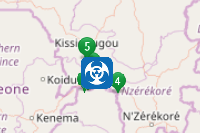

In [37]:
ebola_map_item = webmap_search[2]
ebola_map_item

### Creating a `WebMap` object
You can create an empty web map with a default basemap and no operational layers from the `WebMap` class:

In [38]:
from arcgis.mapping import WebMap
empty_webmap = WebMap()

In [39]:
empty_webmap.layers

[]

You can also create a `WebMap` object from an existing web map item by passing the web map item as the parameter to the constructor:

In [40]:
ebola_map = WebMap(ebola_map_item)

A typical web map consists of a few operational layers and one or more basemap layers. To view the operational layers, call the `layers` property:

In [41]:
for layer in ebola_map.layers:
    print(layer.title)

Ebola
Human Development Index 2014
Human Development Index by country, 2013
Physicians per 1,000 Pop by country, 2010
GLDAS Precipitation 2000 - Present - Copy
Mean January Land Temperature
Mean July Land Temperature
World Transportation
World Forests 30m BaseVue 2013


Similarly, you can find what basemap is used in this web map by querying the `baseMap` property:

In [42]:
ebola_map.basemap

{
  "baseMapLayers": [
    {
      "type": "OpenStreetMap",
      "layerType": "OpenStreetMap",
      "title": "OpenStreetMap",
      "opacity": 1,
      "visibility": true,
      "id": "OpenStreetMap"
    }
  ],
  "title": "OpenStreetMap"
}

At any time, you can get the full definition of the web map by calling the `definition` property:

In [43]:
ebola_map.definition.spatialReference

{
  "wkid": 102100
}

You can also cast the `definition` into a Python `dictionary` and print out the keys:

In [44]:
dict(ebola_map.definition).keys()

dict_keys(['operationalLayers', 'baseMap', 'spatialReference', 'widgets', 'authoringApp', 'authoringAppVersion', 'version'])

### Menampilkan WebMap
When using the Jupyter notebook environment, a `WebMap` object can be easily visualized by simply querying it. A map widget loads up and the map is rendered:

In [45]:
ebola_map

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

### Removing layers from a web map
You can update a web map by adding or removing layers. For instance, the cell below removes one of the layers from the web map and adds a different layer.

In [46]:
# remove the first - unclassed layer from the map
ebola_map.remove_layer(ebola_map.layers[0])

### Adding layers to a web map
To add new layers, call the `add_layer()` method. You can layer objects such as `FeatureLayer`, `ImageryLayer`, `FeatureCollection` objects and also `Item` objects. When adding a layer to the web map you can specify options such as title, custom symbols, visibility, opaticy etc. The code below adds a feature layer collection item to the web map.

In [47]:
liberia_item = gis.content.get('49161527a2bc4f4782b50d2c14e38f4a')
ebola_map.add_layer(liberia_item, options={'title':'Liberia facilities and hospitals'})

Exception: Subscription is canceled, the item is not accessible
(Error Code: 403)

### Saving or Updating a web map
To save a web map, simply call the `save()` method. Similarly, if you created the `WebMap` object from an existing web map item, then you can call the `update()` method to update it. 

Note, `save()` method always creates a new item with updated web map definition, so if you want to create a copy of an existing web map, this is a great way. For instance, the cell below calls the `save()` method and creates a new web map item with the new set of layers without disturbing the original Ebola web map item.

In [ ]:
webmap_item_properties = {'title':'Ebola incidents and facilities',
                         'snippet':'Map created using Python API showing locations of Ebola treatment centers',
                         'tags':['automation', 'ebola', 'world health', 'python']}

ebola_map.save(webmap_item_properties, thumbnail='./webmap_thumbnail.png')

## Working with web scenes
In your GIS, 3D maps are stored as web scene items. Similar to web maps, web scenes contain the definition of the layers, their cartography in JSON. In the `mapping` module, a web scene is represented using a `WebScene` object.

You can search for a web scene similar to any other item:

## Searching for web scene items

In [ ]:
webscene_search = gis.content.search("", item_type="Web Scene")
webscene_search

Let us access the first web scene from this list.

In [ ]:
webscene_item = webscene_search[0]
webscene_item

### Creating a `WebScene` object
You can create a `WebScene` object using the constructor and passing the web scene item as the parameter:

In [ ]:
from arcgis.mapping import WebScene
webscene_obj = WebScene(webscene_item)

The `WebScene` object provides a dictionary representation of the information contained in the web scene. For instance, you can view the list of layers in this web map by querying the operationalLayers key.

In [ ]:
webscene_obj['operationalLayers']

Similar to a `WebMap` seen earlier, you can find the list of all keys that you can query for by calling the keys() function:

In [ ]:
webscene_obj.keys()

### Displaying the web scene
When using the Jupyter notebook environment, a `WebScene` object can be easily visualized by simply querying it. A map widget loads up and the scene is rendered:

In [ ]:
webscene_obj